데이터 : 과일 사진 300장.

사과 100, 파인애플 100, 바나나 100

# 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

## 데이터 가져오기

In [2]:
!wget https://github.com/Chanmi-K/Python/raw/main/Data/fruits_300.zip

--2022-07-04 02:01:31--  https://github.com/Chanmi-K/Python/raw/main/Data/fruits_300.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/fruits_300.zip [following]
--2022-07-04 02:01:31--  https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/fruits_300.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1709876 (1.6M) [application/zip]
Saving to: ‘fruits_300.zip’

fruits_300.zip      100%[===================>]   1.63M  --.-KB/s    in 0.06s   

2022-07-04 02:01:31 (29.0 MB/s) - ‘fruits_300.zip’ saved [1709876/1709876]



In [3]:
!unzip fruits_300.zip

Archive:  fruits_300.zip
  inflating: fruits_300.npy          


In [4]:
fruits = np.load('fruits_300.npy')

## 데이터 살펴보기

In [5]:
print(fruits.shape)

(300, 100, 100)


이미지 크기 100x100

In [6]:
#첫 번째 이미지의 첫 번째 행 출력
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


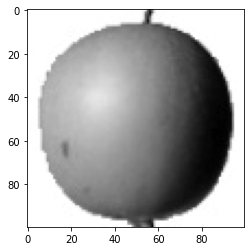

In [7]:
#첫 번째 이미지 출력
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

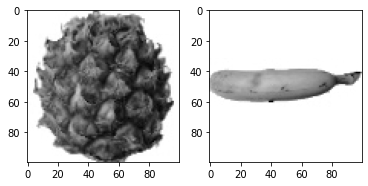

In [8]:
#파인애플과 바나나 이미지도 출력
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 데이터 리쉐입

In [9]:
#3차원 배열을 2차원 배열로 변경
fruits_2d = fruits.reshape(-1, 100*100)

# k-평균 알고리즘

## k-평균 모델 학습

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_2d)

KMeans(n_clusters=3)

In [11]:
#군집된 결과 확인
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [12]:
#레이블 당 샘플 개수 확인
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


## 이미지 출력 draw_fruits

그림으로 출력하기 위한 간단한 유틸리티 함수 생성

In [13]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

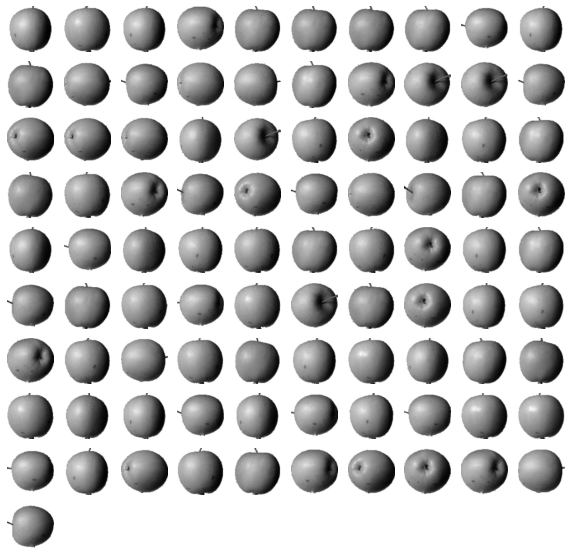

In [14]:
draw_fruits(fruits[km.labels_==0])

## 클러스터 중심

In [15]:
print(km.cluster_centers_.shape)

(3, 10000)


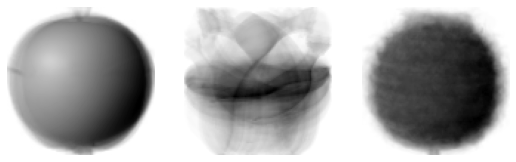

In [16]:
#이미지로 출력하려면 100x100 크기의 2차원 배열로 바꿔야한다
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [17]:
#100번째 이미지의 각 클러스터 중심까지의 거리
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


세 번째 클러스터와의 거리가 제일 작다

이 샘플은 레이블 2에 속한 것 같다

In [18]:
#예측 값을 출력
print(km.predict(fruits_2d[100:101]))

[2]


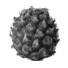

In [19]:
#실제 이미지 출력
draw_fruits(fruits[100:101])

In [20]:
#알고리즘이 반복한 횟수
print(km.n_iter_)

6


## 최적의 k 찾기

엘보우 방법. 이니셔를 계산하여 그래프로 출력

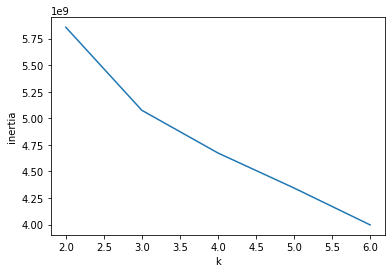

In [21]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

모호하지만 미세하게 그래프가 꺾이는 k=3 부분을 적절하다고 본다

# 주성분 분석 PCA 클래스

## 모델 훈련

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  #주성분 개수 50개로 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [23]:
#주성분의 배열 크기 확인
print(pca.components_.shape)

(50, 10000)


## 이미지 출력 draw_fruits

In [24]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

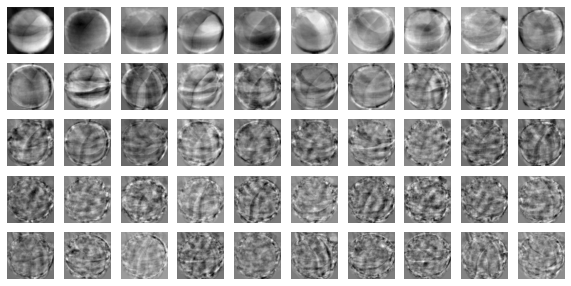

In [25]:
draw_fruits(pca.components_.reshape(-1,100,100))

## 데이터 차원 줄이기

In [26]:
#원본 데이터 크기
print(fruits_2d.shape)

(300, 10000)


In [27]:
#주성분으로 차원 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [28]:
#50개의 차원으로 축소한 데이터로 10,000개의 특성 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


이미지로 다시 출력해보자

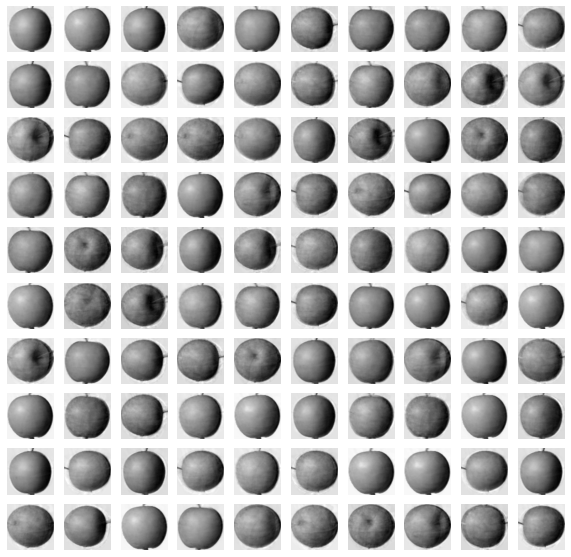

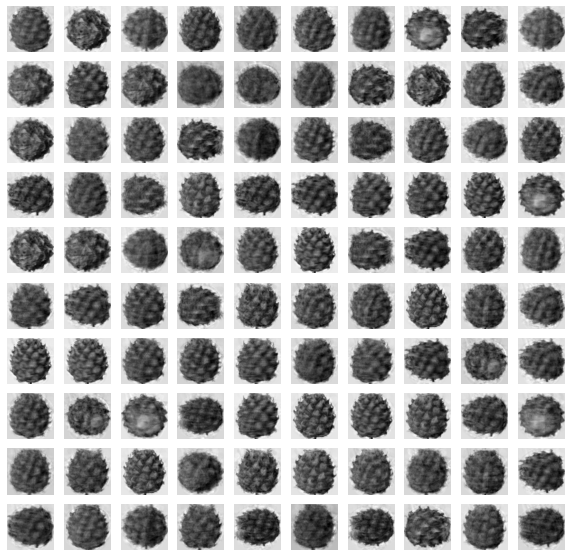

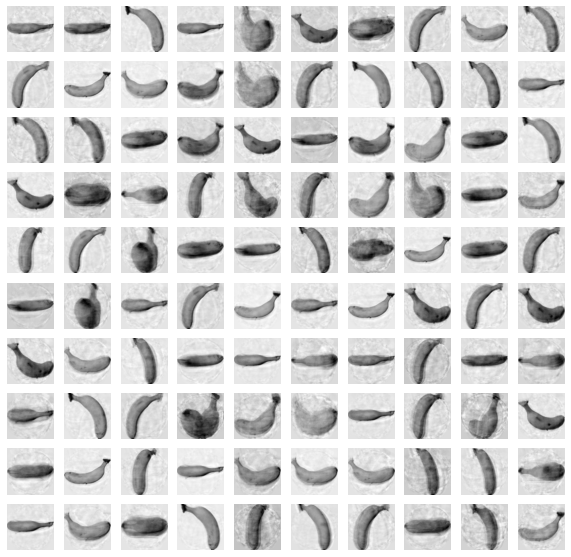

In [29]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

거의 모든 과일이 잘 복원 되었다

## 설명된 분산

In [30]:
#50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9214714056616569


50개의 주성분으로 원본 데이터의 92%를 설명하고 있다

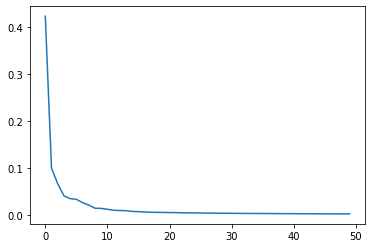

In [31]:
#분산 그래프 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 원본 데이터와 PCA 데이터 비교

## 로지스틱 회귀 모델

3개의 과일 사진을 분류해야하므로 로지스틱 회귀 모델을 사용하자

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [33]:
#지도 학습 모델은 타깃값 필요. 사과 0 파인애플 1 바나나 2
target = np.array([0]*100 + [1]*100 + [2]*100)
print(target.shape)

(300,)


In [34]:
#원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4624808788299561


<원본 데이터>
교차 검증 점수 : 0.997
훈련 시간 : 1.66초

In [35]:
#PCA 축소 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03171982765197754


<PCA 데이터> 
교차 검증 점수 : 1.0 
훈련 시간 : 0.05초

## 분산 50% 주성분

In [36]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


2개의 특성만으로 원본 데이터의 분산 50%를 표현 가능

In [37]:
#주성분 2개로 차원 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


## 교차 검증

In [38]:
#PCA 주성분 2개 축소 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.048642444610595706


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


주성분 2개로 99% 정확도 달성

에러는 반복횟수 증가하라는 경고

## k-평균 알고리즘

In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


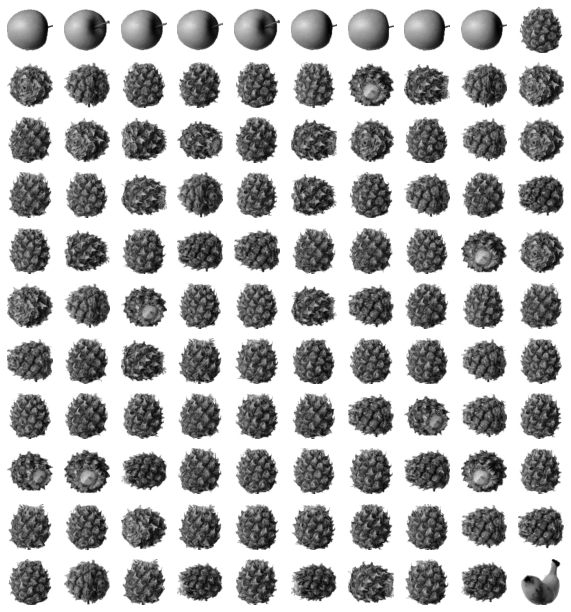

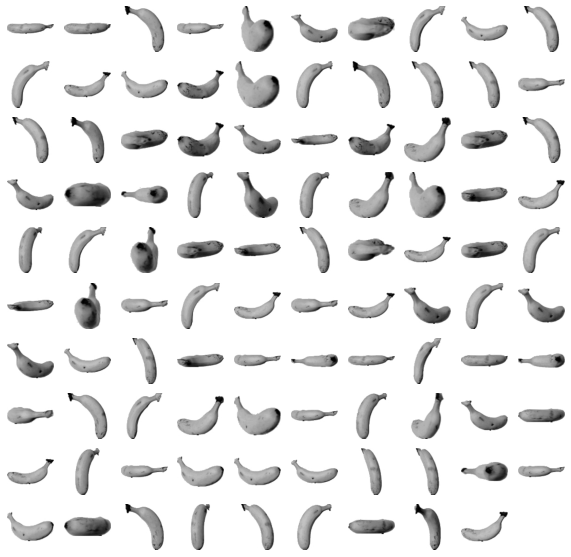

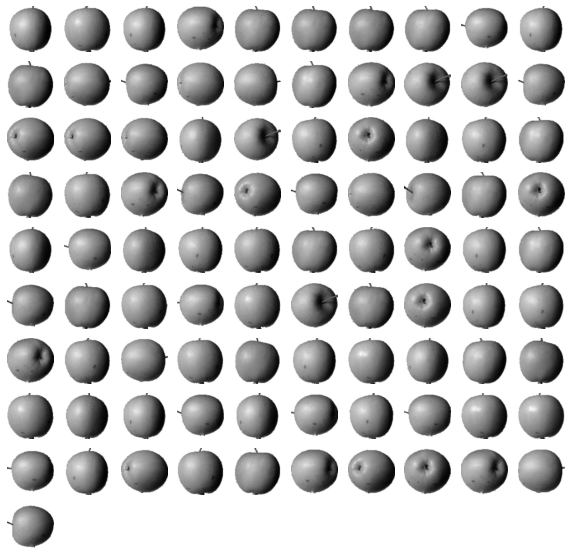

In [40]:
#과일 이미지 출력
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

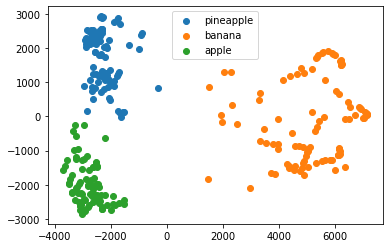

In [42]:
#클러스터별 산점도 그리기
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana','apple'])
plt.show()